# SALES PREDICTION ML MODEL

### Name: Yedusree P S

### Organization: Entri Elevate

### Evaluation Date: 30/08/2024

### Overview of Problem Statement
An e-commerce company wants to optimize its sales forecasting process to enhance decision-making and resource allocation. The company has a rich dataset of past transactions, including customer details, product information, and sales metrics. The challenge is to leverage this data to build a predictive model that can accurately forecast the sales amount for future transactions.

### Objective
To develop a predictive model that can accurately forecast the sales amount for future transactions based on historical data. This will help the e-commerce company to optimize its sales forecasting process, enabling better decision-making and efficient resource allocation.

### Data Description:

#### Source: https://www.kaggle.com/datasets/virtualschool/e-commerce-dataset

#### Features:

1.CustomerID: Unique identifier for each customer.

2.Gender: Gender of the customer.

3.InvoiceDate: Date of the transaction.

4.InvoiceNumber: Unique identifier for each transaction.

5.ProductID: Unique identifier for each product.

6.Quantity: Quantity of the product purchased.

7.Price: Price per unit of the product.

8.Total: Total transaction amount.

9.OrderStatus: Status of the order (e.g., Completed, In Process).

10.Country: Country of the customer.

11.TrafficSource: Source of the traffic (e.g., Social Media, Organic Search).

12.SessionDuration: Duration of the customer's session on the website.

13.DeviceCategory: Category of the device used (e.g., Computer, Mobile).

14.Device: Specific device used (e.g., Laptop, Desktop).

15.OS: Operating system of the device.

16.DeliveryRating: Rating of the delivery service.

17.ProductRating: Rating of the product.

18.Sales: Sales amount for the transaction (target variable).

### Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

### Data Collection

In [2]:
# Loading the dataset 
df=pd.read_csv(r"C:\Users\91963\Desktop\internship\E-Commerce.csv")

In [3]:
# Display the first few rows of the dataset
df.head()

,CustomerID,Gender,InvoiceDate,InvoiceNumber,ProductID,Quantity,Price,Total,OrderStatus,Country,TrafficSource,SessionDuration,DeviceCategory,Device,OS,DeliveryRating,ProductRating,Sales
0,9691,Female,1/01/2019,26088332,32,3,91.37,274.11,Completed,India,Social Media,6.54,Computer,Laptop,Windows,2,5,274.11
1,8327,Female,1/01/2019,95183269,34,1,48.24,48.24,In Process,India,Social Media,5.01,Computer,Desktop,Windows,0,0,0.00
2,6801,Male,1/01/2019,44769684,64,2,35.23,70.46,Completed,United States,Paid Advertisment,0.10,Computer,Desktop,Windows,1,2,70.46
3,4406,Male,1/02/2019,12422351,41,2,32.33,64.66,Completed,Philippines,Social Media,1.95,Mobile,Tablet,Windows,4,4,64.66
4,1966,Male,1/03/2019,84352310,20,1,81.89,81.89,Completed,Brazil,Organic Search,9.15,Computer,Laptop,Windows,5,3,81.89


In [4]:
# Size of the DataFrame
df.shape

(3599, 18)

In [5]:
# Get the column names
df.columns

Index(['CustomerID', 'Gender', 'InvoiceDate', 'InvoiceNumber', 'ProductID',
       'Quantity', 'Price', 'Total', 'OrderStatus', 'Country', 'TrafficSource',
       'SessionDuration', 'DeviceCategory', 'Device', 'OS', 'DeliveryRating',
       'ProductRating', 'Sales'],
      dtype='object')

In [6]:
# Get the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599 entries, 0 to 3598
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       3599 non-null   int64  
 1   Gender           3599 non-null   object 
 2   InvoiceDate      3599 non-null   object 
 3   InvoiceNumber    3599 non-null   int64  
 4   ProductID        3599 non-null   int64  
 5   Quantity         3599 non-null   int64  
 6   Price            3599 non-null   float64
 7   Total            3599 non-null   float64
 8   OrderStatus      3599 non-null   object 
 9   Country          3599 non-null   object 
 10  TrafficSource    3599 non-null   object 
 11  SessionDuration  3599 non-null   float64
 12  DeviceCategory   3599 non-null   object 
 13  Device           3599 non-null   object 
 14  OS               3599 non-null   object 
 15  DeliveryRating   3599 non-null   int64  
 16  ProductRating    3599 non-null   int64  
 17  Sales         

In [7]:
# Generate descriptive statistics
df.describe()

,CustomerID,InvoiceNumber,ProductID,Quantity,Price,Total,SessionDuration,DeliveryRating,ProductRating,Sales
count,3599.000000,3.599000e+03,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000
mean,5526.962767,5.582117e+07,50.864962,2.000556,48.714571,97.394143,4.992101,2.641011,2.653515,61.185285
std,2586.425565,2.568169e+07,29.035862,0.813313,29.499165,74.421471,2.896605,2.181087,2.179732,75.880928
min,1111.000000,1.114055e+07,1.000000,1.000000,1.220000,1.220000,0.010000,0.000000,0.000000,0.000000
25%,3288.000000,3.355699e+07,26.000000,1.000000,26.030000,37.610000,2.490000,0.000000,0.000000,0.000000
50%,5546.000000,5.614293e+07,52.000000,2.000000,43.500000,81.460000,4.930000,3.000000,4.000000,31.260000
75%,7777.000000,7.810160e+07,76.000000,3.000000,74.550000,147.060000,7.515000,5.000000,5.000000,98.040000
max,9998.000000,9.996354e+07,100.000000,3.000000,99.720000,299.160000,10.000000,5.000000,5.000000,299.160000


In [8]:
# Distribution of categorical variables
print(df['Gender'].value_counts())
print(df['OrderStatus'].value_counts())
print(df['Country'].value_counts())
print(df['TrafficSource'].value_counts())
print(df['DeviceCategory'].value_counts())
print(df['Device'].value_counts())
print(df['OS'].value_counts())

Gender
Male      2409
Female    1190
Name: count, dtype: int64
OrderStatus
Completed     2245
In Process     665
Cancelled      457
Returned       232
Name: count, dtype: int64
Country
United States     310
Japan             280
United Kingdom    232
China             224
Germany           193
South Korea       187
India             186
Canada            177
Italy             166
France            160
Russia            138
Spain             130
Mexico            125
Australia         116
Brazil            116
Turkey             94
Netherlands        87
Taiwan             86
Indonesia          82
Switzerland        80
Saudi Arabia       54
Poland             52
Argentina          47
Egypt              46
Vietnam            45
Belgium            40
Philippines        40
Nigeria            38
Thailand           37
Iran               31
Name: count, dtype: int64
TrafficSource
Organic Search       1796
Social Media         1192
Paid Advertisment     611
Name: count, dtype: int64
DeviceCateg

In [9]:
# Get the maximun value in each coulumn
df.apply(np.max)

CustomerID                 9998
Gender                     Male
InvoiceDate           9/30/2023
InvoiceNumber          99963542
ProductID                   100
Quantity                      3
Price                     99.72
Total                    299.16
OrderStatus            Returned
Country                 Vietnam
TrafficSource      Social Media
SessionDuration            10.0
DeviceCategory           Mobile
Device                   Tablet
OS                          iOS
DeliveryRating                5
ProductRating                 5
Sales                    299.16
dtype: object

### Data Preprocessing - Data Cleaning

In [10]:
#Checking for missing values
df.isnull().sum()

CustomerID         0
Gender             0
InvoiceDate        0
InvoiceNumber      0
ProductID          0
Quantity           0
Price              0
Total              0
OrderStatus        0
Country            0
TrafficSource      0
SessionDuration    0
DeviceCategory     0
Device             0
OS                 0
DeliveryRating     0
ProductRating      0
Sales              0
dtype: int64

In [11]:
# Checking for duplicates 
df.duplicated().sum()

0

In [12]:
# converting the data type
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate']) 

In [13]:
df.dtypes

CustomerID                  int64
Gender                     object
InvoiceDate        datetime64[ns]
InvoiceNumber               int64
ProductID                   int64
Quantity                    int64
Price                     float64
Total                     float64
OrderStatus                object
Country                    object
TrafficSource              object
SessionDuration           float64
DeviceCategory             object
Device                     object
OS                         object
DeliveryRating              int64
ProductRating               int64
Sales                     float64
dtype: object

In [14]:
# Rename the columns
df.rename(columns={'Total':'TotalAmount','Sales': 'SalesAmount'}, inplace=True)
df.columns

Index(['CustomerID', 'Gender', 'InvoiceDate', 'InvoiceNumber', 'ProductID',
       'Quantity', 'Price', 'TotalAmount', 'OrderStatus', 'Country',
       'TrafficSource', 'SessionDuration', 'DeviceCategory', 'Device', 'OS',
       'DeliveryRating', 'ProductRating', 'SalesAmount'],
      dtype='object')

#### Outlier Detection

#### 1.Visualization Method (Box plot)

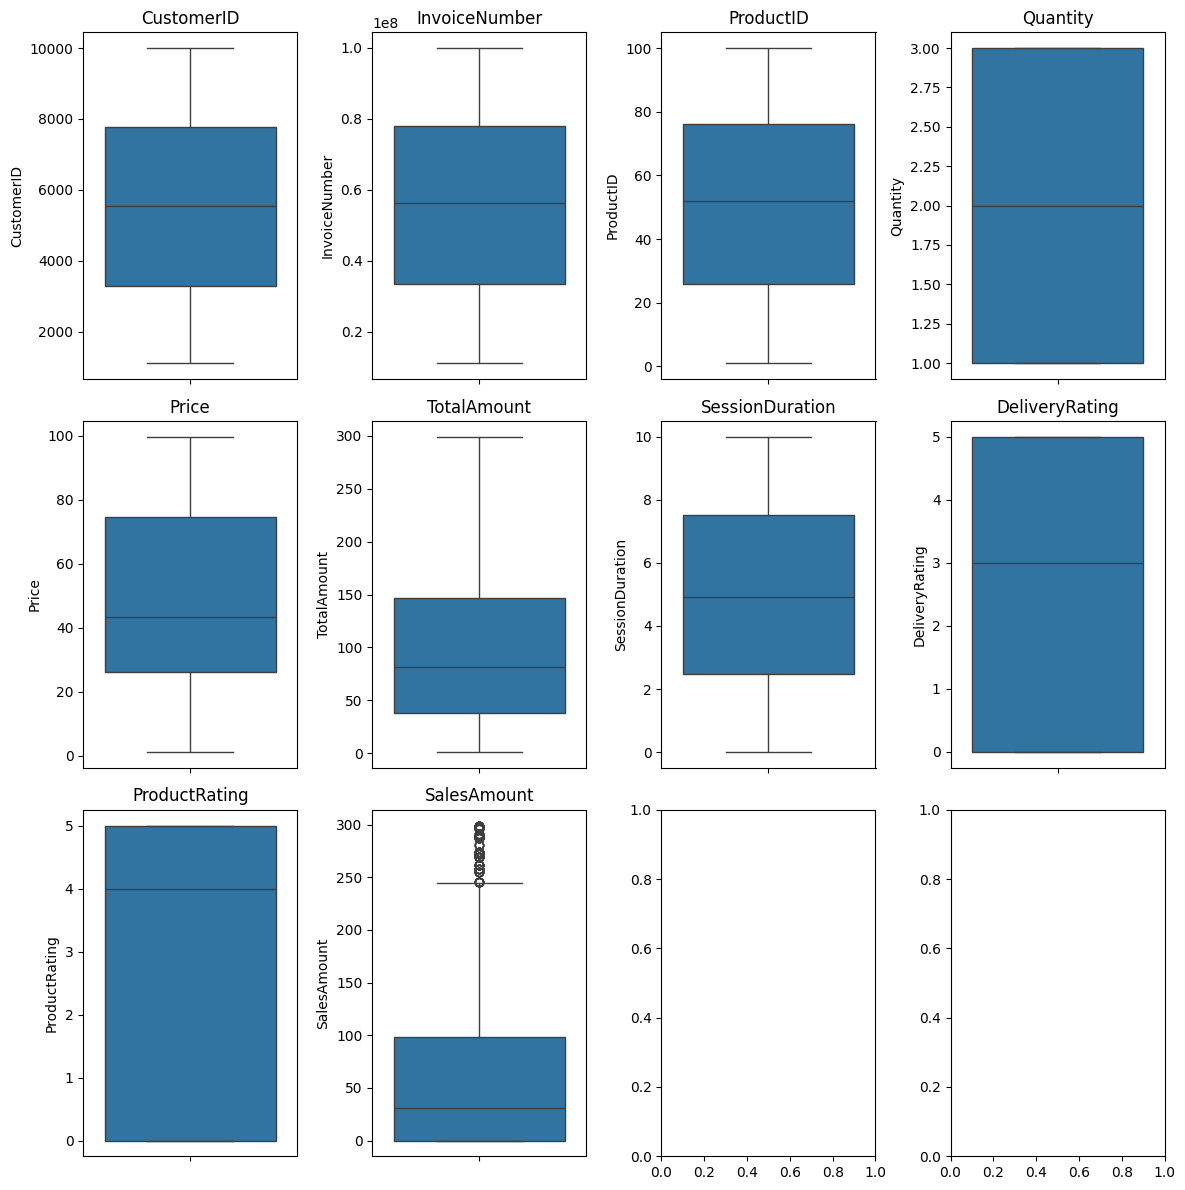

In [15]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_cols):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

#### 2.IQR Method ( Identifies outliers based on quartiles )

In [16]:
def find_outliers(data, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [17]:
for column in df.select_dtypes(include=[np.number]).columns:
    outliers = find_outliers(df, column)
    print(f"{column} has {len(outliers)} outliers.")

CustomerID has 0 outliers.
InvoiceNumber has 0 outliers.
ProductID has 0 outliers.
Quantity has 0 outliers.
Price has 0 outliers.
TotalAmount has 0 outliers.
SessionDuration has 0 outliers.
DeliveryRating has 0 outliers.
ProductRating has 0 outliers.
SalesAmount has 134 outliers.


#### 3.ZScore Method ( Measures how many standard deviations a data point is from the mean )

In [18]:
mean=df.SalesAmount.mean()
std=df.SalesAmount.std()
df["zscore"]=(df.SalesAmount-mean)/std

#outliers
Outliers=df[(df.zscore<-3)|(df.zscore>3)]
Outliers

,CustomerID,Gender,InvoiceDate,InvoiceNumber,ProductID,Quantity,Price,TotalAmount,OrderStatus,Country,TrafficSource,SessionDuration,DeviceCategory,Device,OS,DeliveryRating,ProductRating,SalesAmount,zscore
33,1847,Female,2019-01-19,85343805,49,3,99.72,299.16,Completed,Indonesia,Social Media,5.43,Computer,Laptop,Windows,5,4,299.16,3.136160
57,2495,Male,2019-01-30,50599444,21,3,98.91,296.73,Completed,China,Organic Search,2.21,Mobile,Tablet,Windows,4,3,296.73,3.104136
231,1847,Female,2019-04-26,66128332,24,3,99.58,298.74,Completed,China,Social Media,0.46,Mobile,Smart Phone,Android,3,4,298.74,3.130625
252,5033,Male,2019-05-07,26919482,3,3,97.19,291.57,Completed,Saudi Arabia,Social Media,3.87,Computer,Desktop,Windows,4,3,291.57,3.036135
328,9154,Male,2019-06-12,32647874,100,3,98.59,295.77,Completed,United States,Organic Search,6.57,Mobile,Smart Phone,Android,4,5,295.77,3.091485
544,5895,Male,2019-10-01,96727796,69,3,96.47,289.41,Completed,Spain,Organic Search,4.94,Computer,Desktop,Windows,3,4,289.41,3.007669
569,3011,Male,2019-10-15,55129277,100,3,98.59,295.77,Completed,Thailand,Paid Advertisment,7.30,Mobile,Smart Phone,Android,4,4,295.77,3.091485
712,3790,Male,2019-12-25,25888666,3,3,97.19,291.57,Completed,Netherlands,Organic Search,0.86,Computer,Desktop,Windows,3,5,291.57,3.036135
756,8709,Male,2020-01-13,38188975,21,3,98.91,296.73,Completed,India,Social Media,8.51,Computer,Desktop,Mac,4,5,296.73,3.104136
784,6459,Female,2020-01-27,63280940,24,3,99.58,298.74,Completed,Nigeria,Paid Advertisment,9.98,Mobile,Smart Phone,Android,4,4,298.74,3.130625


In [19]:
no_outliers = len(Outliers)
no_outliers

39

#### Outlier Detection Overview
After applying all three outlier detection methods, outliers are especially evident in the "SalesAmount" column.These outliers can impact the performance and stability of the models,so it is essential to handle them appropriately. 
Since all the outliers in the "SalesAmount" column are those with values exceeding the upper bound, the outlier handling is done by capping them with the upper bound value.

#### Outlier Handlling ( Capping )

In [20]:
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print("Upper Bound:", upper_bound)

Upper Bound: 245.10000000000002


In [21]:
#Relpacing the outliers with upper_bound
df['SalesAmount'] = np.where(df['SalesAmount'] > upper_bound, upper_bound, df['SalesAmount'])

In [22]:
# Drop the Z-score column as it's no longer needed
df.drop(columns=['zscore'], inplace=True)

In [23]:
#skewness
from scipy.stats import skew
skewness = skew(df['SalesAmount'])
skewness

1.119526885499905

##### Since the SalesAmount column includes zeroes, no transformation was performed to reduce skewness. Furthermore, the data exhibits moderate positive skewness

### Exploratory Data Analysis

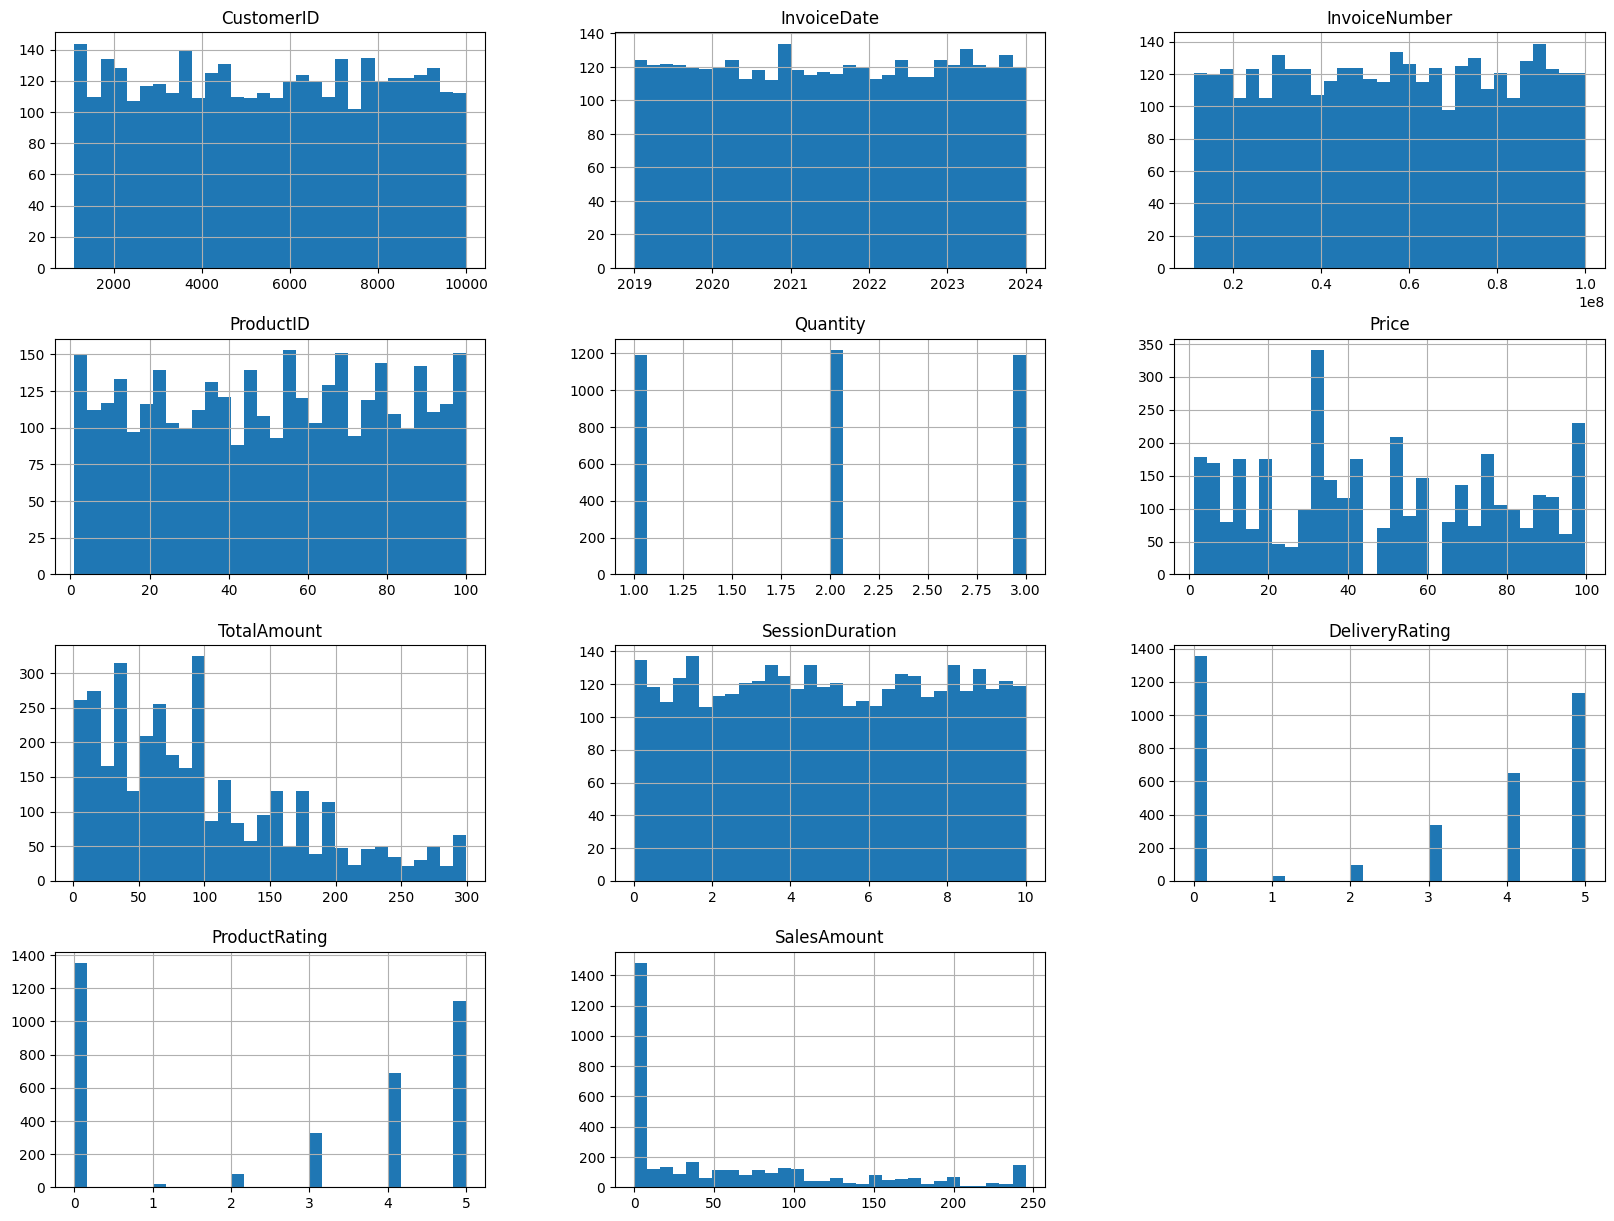

In [24]:
#histograms for numerical columns
df.hist(bins=30, figsize=(20, 15))
plt.show()

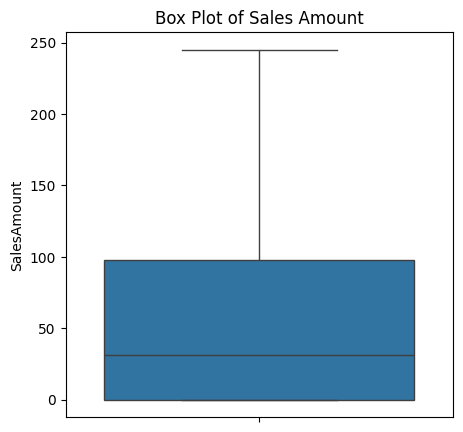

In [25]:
# Box plot of SalesAmount
plt.figure(figsize=(5, 5))
sns.boxplot(data=df['SalesAmount'])
plt.xticks(rotation=90)
plt.title('Box Plot of Sales Amount')
plt.show()

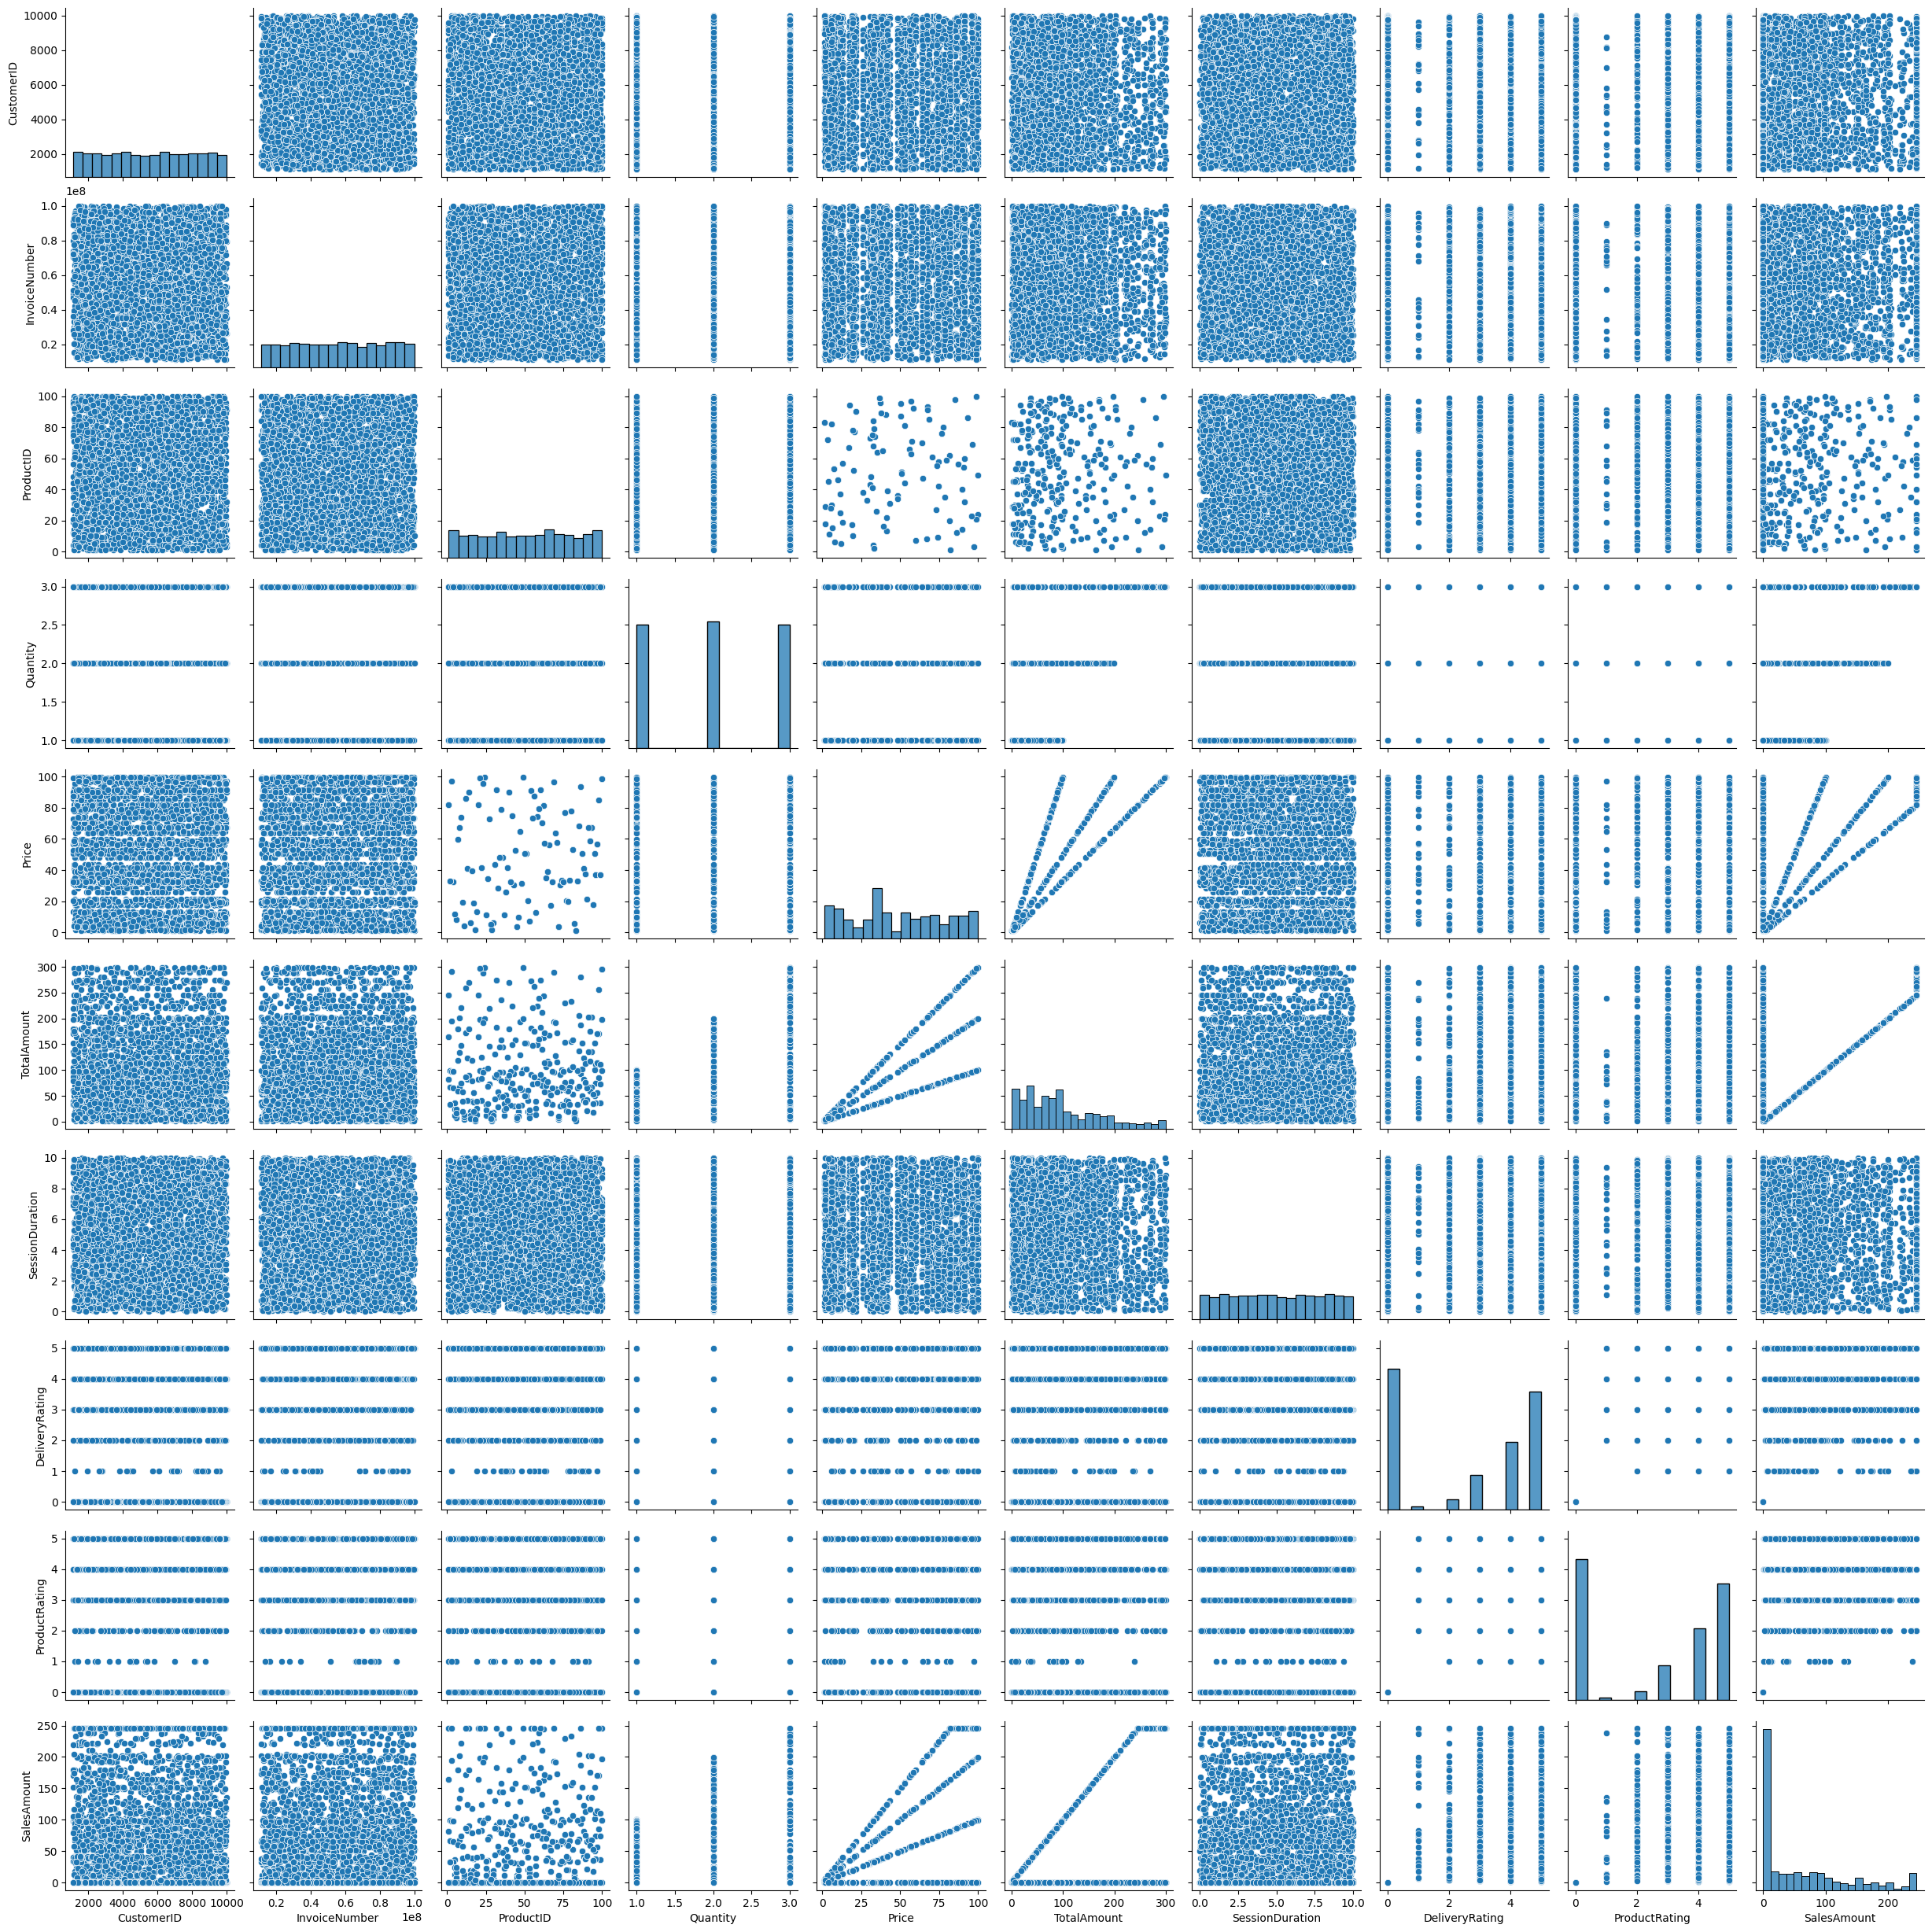

In [26]:
# Pair plot to see relationships between numerical variables
sns.pairplot(df)
plt.show()

<Axes: xlabel='SalesAmount', ylabel='Count'>

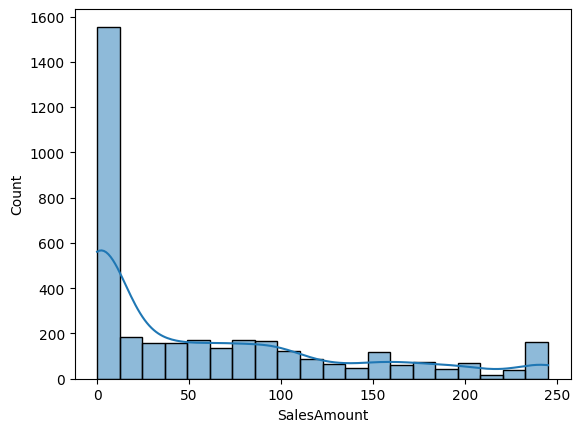

In [27]:
#histplot
sns.histplot(data=df,x=df.SalesAmount,kde=True)

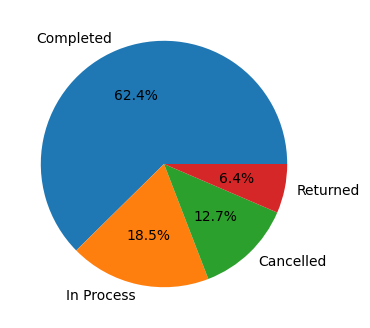

In [28]:
#pie chart for a categorical feature
categorical_feature = 'OrderStatus'
df[categorical_feature].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4))
plt.ylabel('')
plt.show()

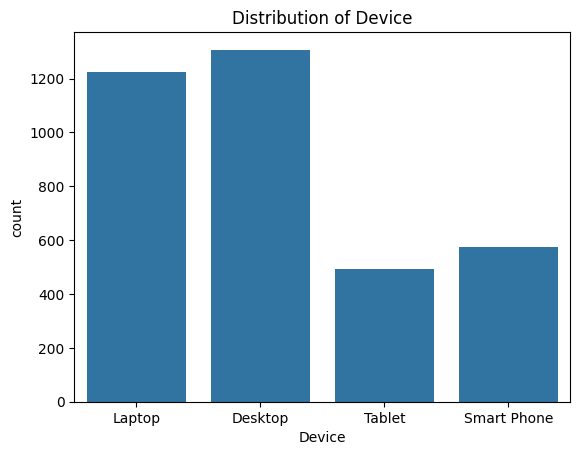

In [29]:
#Plot a bar plot for a categorical feature
sns.countplot( x='Device',data=df)
plt.title('Distribution of Device')
plt.show()

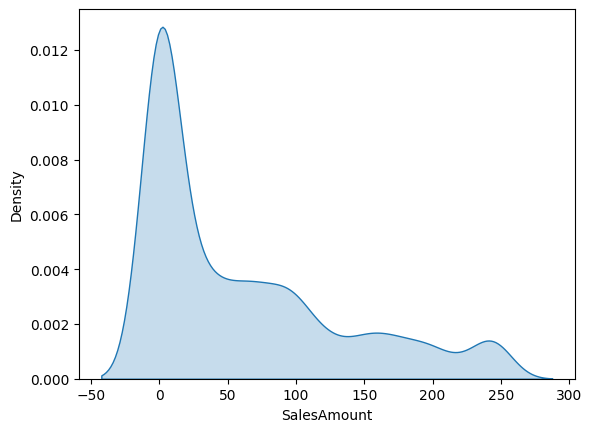

In [30]:
# KDE Plot
numerical_feature = 'SalesAmount'
sns.kdeplot(data=df, x=numerical_feature, fill=True)
plt.show()

### Feature Engineering

#### One Hot Encoding

In [31]:
#Removing columns that do not significantly impact the performance of the target variable, sales.
df = df.drop(['CustomerID','Gender','InvoiceDate','InvoiceNumber','ProductID','OS'], axis=1)

In [32]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [33]:
#object created for the class
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder= OneHotEncoder(sparse_output=False, handle_unknown = 'ignore')
encoded_cols=one_hot_encoder.fit_transform(df[categorical_cols])

In [34]:
#converting matrix to df
df_encoded=pd.DataFrame(encoded_cols)

In [35]:
#name columns
df_encoded = pd.DataFrame(encoded_cols,columns=one_hot_encoder.get_feature_names_out(categorical_cols))

In [36]:
df_one_hot_encoded=pd.concat([df[numerical_cols], df_encoded], axis=1)
df_one_hot_encoded

,Quantity,Price,TotalAmount,SessionDuration,DeliveryRating,ProductRating,SalesAmount,OrderStatus_Cancelled,OrderStatus_Completed,OrderStatus_In Process,...,Country_Vietnam,TrafficSource_Organic Search,TrafficSource_Paid Advertisment,TrafficSource_Social Media,DeviceCategory_Computer,DeviceCategory_Mobile,Device_Desktop,Device_Laptop,Device_Smart Phone,Device_Tablet
0,3,91.37,274.11,6.54,2,5,245.10,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,48.24,48.24,5.01,0,0,0.00,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2,35.23,70.46,0.10,1,2,70.46,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,2,32.33,64.66,1.95,4,4,64.66,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,81.89,81.89,9.15,5,3,81.89,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,3,32.34,97.02,9.42,0,0,0.00,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3595,1,33.11,33.11,9.78,4,5,33.11,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3596,1,33.11,33.11,9.80,3,5,33.11,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3597,2,73.53,147.06,6.53,0,0,0.00,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Split the data into training and testing sets

In [37]:
# Separate features and target variable
X = df_one_hot_encoded.drop(columns=['SalesAmount'])
y = df_one_hot_encoded['SalesAmount']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature selection

#### 1.Correlation Analysis

In [39]:
#correlation
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
corr1=numerical_cols.corr()
corr1

,Quantity,Price,TotalAmount,SessionDuration,DeliveryRating,ProductRating,SalesAmount
Quantity,1.000000,-0.002588,0.534017,-0.012817,0.021421,0.017511,0.339943
Price,-0.002588,1.000000,0.780592,-0.002475,0.000528,-0.005331,0.478698
TotalAmount,0.534017,0.780592,1.000000,0.003919,0.010754,0.005905,0.614985
SessionDuration,-0.012817,-0.002475,0.003919,1.000000,0.005497,0.004996,0.001627
DeliveryRating,0.021421,0.000528,0.010754,0.005497,1.000000,0.887568,0.603065
ProductRating,0.017511,-0.005331,0.005905,0.004996,0.887568,1.000000,0.601082
SalesAmount,0.339943,0.478698,0.614985,0.001627,0.603065,0.601082,1.000000


<Axes: >

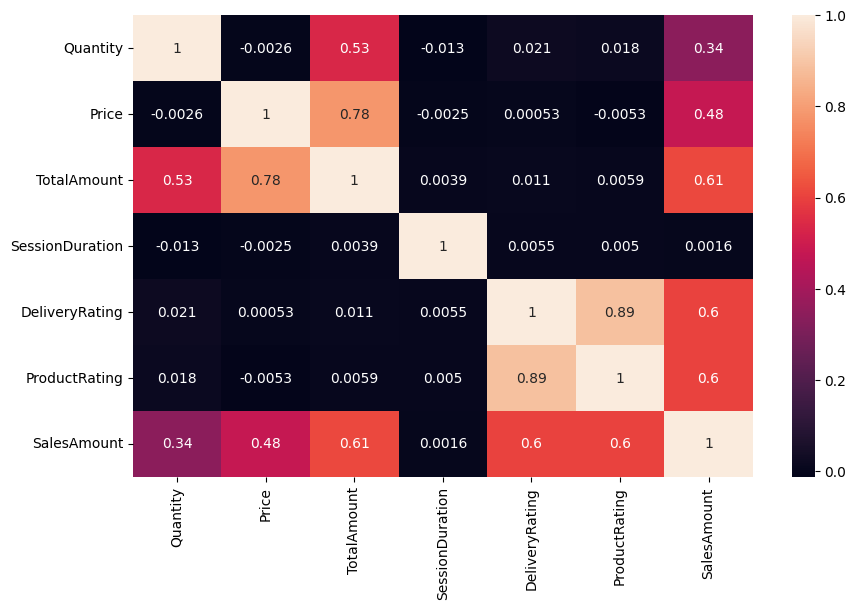

In [40]:
#Heatmap
plt.figure(figsize=(10, 6))  
sns.heatmap(corr1,annot=True)

#### 2.SelectKbest -Filter method

In [41]:
from sklearn.feature_selection import SelectKBest, f_regression
k_best = SelectKBest(score_func=f_regression, k=9)
k_best.fit(X_train, y_train)
mask = k_best.get_support()
top_features_kbest = X_train.columns[mask]

In [42]:
top_features_kbest

Index(['Quantity', 'Price', 'TotalAmount', 'DeliveryRating', 'ProductRating',
       'OrderStatus_Cancelled', 'OrderStatus_Completed',
       'OrderStatus_In Process', 'OrderStatus_Returned'],
      dtype='object')

In [43]:
# Reduce the dataset to selected features
X_train_selected = X_train[top_features_kbest]
X_test_selected = X_test[top_features_kbest]

### Feature Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
# Initialize the scaler
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [46]:
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

### ML Model Building

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [48]:
# Initialize models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor( random_state=42),
    "AdaBoostRegressor": AdaBoostRegressor( random_state=42),
    "MLPRegressor": MLPRegressor(max_iter=1000,random_state=42),
    "SVR": SVR(kernel='linear')
}

#### Train and evaluate models 

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
# Function to evaluate models
def evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test):
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mae, mse,rmse,r2

In [51]:
# Evaluate each model and print the results
for name, model in models.items():
    print(f"{name}:")
    mae, mse,rmse, r2= evaluate_model(model,X_train_scaled,X_test_scaled, y_train, y_test)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")
    print("\n")

LinearRegression:
Mean Absolute Error (MAE): 28.33300441548603
Mean Squared Error (MSE): 1300.3100604427982
Root Mean Squared Error (RMSE): 36.059812262999905
R^2 Score: 0.7645517505178498


RandomForestRegressor:
Mean Absolute Error (MAE): 0.017542083333376257
Mean Squared Error (MSE): 0.03788503309722467
Root Mean Squared Error (RMSE): 0.19464077963578102
R^2 Score: 0.9999931401248089


GradientBoostingRegressor:
Mean Absolute Error (MAE): 0.38184002840570436
Mean Squared Error (MSE): 0.3615708611385093
Root Mean Squared Error (RMSE): 0.6013076260438656
R^2 Score: 0.9999345300564007


AdaBoostRegressor:
Mean Absolute Error (MAE): 5.578039436600383
Mean Squared Error (MSE): 70.32808002874721
Root Mean Squared Error (RMSE): 8.386183877589806
R^2 Score: 0.987265634685184


MLPRegressor:


C:\Users\91963\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Absolute Error (MAE): 0.46298980272997164
Mean Squared Error (MSE): 0.7181878635312898
Root Mean Squared Error (RMSE): 0.8474596530403614
R^2 Score: 0.9998699571122213


SVR:
Mean Absolute Error (MAE): 26.56340586461824
Mean Squared Error (MSE): 1525.2779564925768
Root Mean Squared Error (RMSE): 39.054807085589054
R^2 Score: 0.7238166220850473




### Hyperparameter Tuning

In [52]:
models = {
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100, 300],
            'max_depth': [10,20],
           'min_samples_split': [2, 5, 10],
        }
    },
    'MLPRegressor': {
        'model':MLPRegressor(),
        'params':{
            'hidden_layer_sizes': [(50,50,),(100, 50)],
            'max_iter': [1000,1500],
            'alpha': [0.0001,0.001], 
             'early_stopping': [True]
        }
    },
     'GradientBoostingRegressor': {
        'model':GradientBoostingRegressor(),
        'params':{
            'n_estimators': [ 100, 300],
            'learning_rate': [0.01, 0.1]
        }
    },
    'AdaBoostRegressor': {
       'model':AdaBoostRegressor(),
       'params':{
           'n_estimators': [ 100, 200],
           'learning_rate': [0.01, 0.1, ]
        }
   }, 
    'SVR': {
      'model': SVR(),
      'params': {
         'kernel': ['linear', 'poly', 'rbf'],
         'C': [0.1, 1,10]
        }
  },
      
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            'positive': [True, False]
        }
    }
   
}

In [53]:
# Dictionary to store the best models
best_models = {}

In [ ]:
# Perform grid search for each model
from sklearn.model_selection import GridSearchCV
for model_name, config in models.items():
    model = config['model']
    params = config['params']
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Best parameters for RandomForestRegressor: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for MLPRegressor: {'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (100, 50), 'max_iter': 1500}
Best parameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'n_estimators': 300}
Best parameters for AdaBoostRegressor: {'learning_rate': 0.1, 'n_estimators': 200}


In [ ]:
# Evaluate the best models and print the result
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Model : {model_name}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")
    print("\n")

### Analysis of the model Performance (Based on performance metrics)
##### Top Performers-

RandomForestRegressor : RandomForestRegressor has the lowest error metrics and highest R2 score among all models,making it the most accurate and reliable model for this dataset.

GradientBoostingRegressor : GradientBoostingRegressor also performs well, but with slightly higher errors compared to RandomForestRegressor.

##### Mid-Tier Performers-

MLPRegressor and SVR : These models show reasonable performance, but with significantly higher errors than the top two models.

##### Poor Performers-

AdaBoostRegressor and LinearRegression : These models suffer from high errors across all metrics, making them not that suitable for this dataset.LinearRegression performs the worst among the models.



#### Calculate and plot residuals for each model

In [ ]:
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test_scaled)
    residuals = y_test - y_pred
    plt.figure(figsize=(5, 3))
    sns.residplot(x=y_pred, y=residuals, lowess=True)
    plt.title(f'Residual Plot for {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(0, color='r', linestyle='--')
    plt.show()

From the residual plots, the Random Forest Regressor displays residuals that are closely clustered around the zero line with minimal spread where as GradientBoostingRegressor shows more spread and some structure in the residuals. This suggests that  Random Forest Regressor has few outliers and demonstrates strong predictive accuracy across the range of predicted values. With high R² values, the RandomForestRegressor appears to be the best-performing model, exhibiting minimal overfitting.

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
score = rf.score(X_test_scaled, y_test)
print(f"Testing score:{score}")
train_score = rf.score(X_train_scaled, y_train)
print(f"Training score: {train_score}")
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")



The testing score is very close to the training score, indicating that the model performs well on both the training and unseen data.
The cross-validation scores are consistently high and close to the mean cross-validation score. This consistency across different folds of the data further supports the model's robust performance

Overall, these results suggest that RandomForestRegressor is performing exceptionally well without significant overfitting.



### Saving the  best model

In [ ]:
import joblib

In [ ]:
best_model = RandomForestRegressor()

In [ ]:
best_model.fit(X_train_scaled, y_train) 

In [ ]:
# Saving the best  model
joblib.dump(best_model, 'random_forest_model.joblib')

### Loading the Model

In [ ]:
loaded_model = joblib.load('random_forest_model.joblib')

### Test with unseen data

In [ ]:
# Manually create the feature array with the same order

#Quantity/Price/TotalAmount/DeliveryRating/ProductRating/OrderStatus_Cancelled/OrderStatus_Completed/OrderStatus_In Process/OrderStatus_Returned.
    
unseen_data = np.array([3, 81.5,243, 4, 5, 0, 1, 0, 0]).reshape(1, -1)
unseen_data

In [ ]:
# predictions with the unseen data
predictions = loaded_model.predict(unseen_data)

print(predictions)

### Interpretation of Results

#### Model Performance-

##### 1.Accuracy and Fit:
The RandomForestRegressor achieved a testing score of 0.999993 and a training score of 0.999964, indicating an excellent fit both on the training and testing datasets.

The R² scores from cross-validation are consistently high, with a mean score of 0.999948. This suggests that the model explains a significant portion of the variance in the target variable.

##### 2.Error Metrics:

The low Mean Absolute Error (MAE) of 0.0163, Mean Squared Error (MSE) of 0.0164, and Root Mean Squared Error (RMSE) of 0.1282 indicate that the model's predictions are very close to the actual values.

##### 3.Generalization:

The close proximity between training and testing scores, combined with high and stable cross-validation scores, suggests that the model is not overfitting and generalizes well to unseen data.

#### Conclusion-


The RandomForestRegressor model demonstrates excellent predictive performance with minimal error, high R² scores, and strong generalization capabilities. This makes it a robust choice for the regression problem at hand.

#### Limitations of the Dataset

##### 1.Skewed Sales Distribution:

The target variable Sales is slightly skewed. This skewness can make it challenging for the model to predict smaller sales amounts accurately, as the model might become biased towards predicting higher values.Also the sales amount olumn contains zeroes in it.

##### 2.Missing Values:
Some values in the Product Rating and Delivery Rating columns are zero, likely because not all customers provided ratings. If more customers had provided ratings, the model could potentially yield better result.

##### 3.Irrelevant Features:
There are a few irrelevant features in this dataset that might not have a strong direct impact on sales amounts, potentially introducing noise into the model.


### Future Work

##### 1.Feature Engineering:

Explore temporal features such as seasonality or trends in InvoiceDate or the time of day to improve predictive accuracy.

##### 2.Model Interpretability:

Consider techniques like SHAP values to understand model predictions better, especially when deploying more complex models.

##### 3.Data Augmentation:

Create synthetic data to address imbalances or sparsity in the dataset, which can improve model robustness.